<a href="https://colab.research.google.com/github/mascalmeida/pygamma/blob/main/MainCode_PyGamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código principal
Com o objetivo de fomentar o aprendizado python para aplicações de ciência de dados, o grupo de pesquisa <a href="http://www.gamma.ufba.br/">Gamma</a> passou a promover encontros semanais para discussão de técnicas, algoritmos e estratégias acerca do tema. Esse notebook é o produto desses encontros, o objetivo é que ele seja didático e introdutório para quem também deseja aprender um pouco sobre python e ciência de dados.

> Autores

- Brenner (<a href="https://github.com/bbiasi">@bbiasi</a>)
- Júlia (<a href="https://github.com/juliabijos">@juliabijos</a>)
- Lucas (<a href="https://github.com/mascalmeida">@mascalmeida</a>)
- Nicole (<a href="https://github.com/nicoleprincipe">@nicoleprincipe</a>)
- Robson (<a href="https://github.com/rpessoa1983">@rpessoa1983</a>)


> Estudo de caso

O estudo de caso desse trabalho é descrito no seguinte artigo: "Application of steady-state and dynamic modeling for the prediction of the BOD of an aerated lagoon at a pulp and paper mill: Part I. Linear approaches" [<a href="https://www.sciencedirect.com/science/article/abs/pii/S1385894704002104">link</a>].

> Etapas

1. Primeiros comandos
2. Pré-Processamento 1 (Unir o dt_in com o dt_out e Sincronizar)
3. Pré-Processamento 2 (% de NA por coluna e Remover coluna > 40% NA)
4. Pré-Processamento 3 (Imputar as colunas com < 40% NA)
5. Pré-Processamento 4 (Filtro de dados e Criar novas variáveis)
6. Redução de dimensionalidade
7. Classificação
8. Interpretação de modelos




## Primeiros comandos

In [1]:
# Para comentar basta usar o '#'
print('Oi!')
## print('comentario')
v = ['posicao_0', 1, 'elemento_3', int(2021), float(9.2), 'final da lista']
print(v)

Oi!
['posicao_0', 1, 'elemento_3', 2021, 9.2, 'final da lista']


## Pacotes

In [2]:
# Importando pacotes
## Manipulação de dados
import pandas as pd
## Visualização de dados
import matplotlib.pyplot as plt

## Importando dados

In [3]:
## Definindo o link
link = 'https://github.com/ufbagamma/pygamma/blob/main/raw_data.xlsx?raw=true'
## Lendo banco de dados
dt_input = pd.read_excel(link, sheet_name='input_data')
dt_output = pd.read_excel(link, sheet_name='output_data')
## Exibindo o dataframe - exibindo o cabeçalho
display(dt_input.head(2), dt_output.head(2))

,Datein,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),NNin (ppm),Pin (ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia)
0,1996-09-01,79757,236.0,465.0,NaN,6.65,NaN,NaN,NaN,356.0,NaN,1180.0,4.8,878.13,962.1
1,1996-09-02,78818,270.0,483.0,NaN,6.04,NaN,0.26,NaN,433.0,43.0,1230.0,1.5,925.60,986.8


,Dateout,BODout(ppm),CODout (ppm),SSout(ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Breve exploração

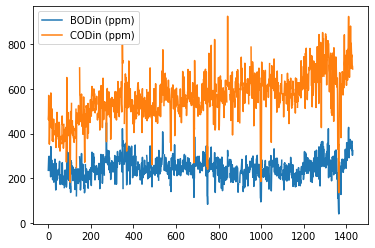

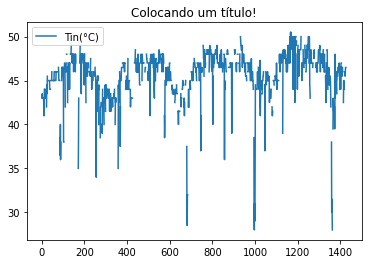

In [4]:
# Visualizando com pandas
## Compondo o gráfico 1
dt_input['BODin (ppm)'].plot()
dt_input['CODin (ppm)'].plot()
plt.legend()
plt.show()
## Compondo o gráfico 2
dt_input['Tin(°C)'].plot()
plt.legend()
plt.title('Colocando um título!')
plt.show()

## Investigando dados e definindo etapas do pre processamento
1. Unir o dt_in com o dt_out e Sincronizar (Brenner)
2. % de NA por coluna e Remover coluna > 40% NA (Robson)
3. Imputar as colunas com < 40% NA. É possível trabalhar com funções? Inserir valores a partir de estatísticas como média ou mediana. (Júlia)
4. Filtro de dados e Criar novas variáveis (Nicole)

### Unindo e Sincronizando

In [5]:
# Rename
## Forma 1 de renomear - Copiando a variável
### Criando variavel copia
dt_input["date_in"] = dt_input["Datein"]
### Dropando variavel antiga
dt_input = dt_input.drop(columns = ["Datein"])
## Forma 2 de renomear - Usando a função rename
### Rename
dt_output = dt_output.rename(columns = {"Dateout" : "date_out"})
## Exibindo datasets
display(dt_input.head(2),dt_output.head(2))

,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),NNin (ppm),Pin (ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),date_in
0,79757,236.0,465.0,NaN,6.65,NaN,NaN,NaN,356.0,NaN,1180.0,4.8,878.13,962.1,1996-09-01
1,78818,270.0,483.0,NaN,6.04,NaN,0.26,NaN,433.0,43.0,1230.0,1.5,925.60,986.8,1996-09-02


,date_out,BODout(ppm),CODout (ppm),SSout(ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Sincronizando os datasets
## Remover linhas com NaT apenas nas colunas especificadas 
dt_output = dt_output.dropna(subset=['date_out']).reset_index(drop=True)
## Remover linhas do dataset input para alinhar com o output
dt_input = dt_input.loc[dt_input['date_in'] < '2000-07-30', :]
## Merge não funcionou, o conceito é de concat
dt_tot = pd.concat([dt_input, dt_output], axis=1)
## Removendo a data do output
dt_tot = dt_tot.drop(columns=['date_out'])
## Renomeando a data do input como a data principal
dt_tot = dt_tot.rename(columns = {'date_in' : 'date'})
## Visualizando o dataset
display(dt_tot.head(2))

,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),NNin (ppm),Pin (ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),date,BODout(ppm),CODout (ppm),SSout(ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,79757,236.0,465.0,NaN,6.65,NaN,NaN,NaN,356.0,NaN,1180.0,4.8,878.13,962.1,1996-09-01,74.0,245.0,NaN,311.0,33.5,1190.0,84096.8495
1,78818,270.0,483.0,NaN,6.04,NaN,0.26,NaN,433.0,43.0,1230.0,1.5,925.60,986.8,1996-09-02,88.0,237.0,NaN,298.0,33.0,1140.0,79542.4680


### Lidando com valores faltantes (NA)

In [7]:
# Cálculo de % dos dados faltantes 
## Calculando %NaN e transformando em dataframe
dt_na = pd.DataFrame((dt_tot.isna().sum()/len(dt_tot))*100, columns=['%NA']).reset_index()
## Renomeando as colunas
dt_na.columns = ['feature', '%na']
## Objeto que vai armazenar o criterio para remocao por %na
lim_cut = 40
## Criando lista com variáveis que serão removidas - .tolist()
### Agora vamos filtrar, vamos para o ponto loc Brenner?
### .loc() - permite o acesso das celulas do dataframe
list_na = dt_na.loc[dt_na['%na'] >= lim_cut, 'feature'].tolist()
## Como fazer sem entender! rs
print('Visualizando dataset após o uso da função .drop()')
display(dt_tot.drop(columns=list_na).head(2))
## Como fazer entendendo! rs
### Preservando dataset principal
aux = dt_tot.copy()
### Laço para remover cada coluna com %na > lim_cut
print('\n\nVisualizando o dataset após remover as variáveis usando o laço (for)\n')
for i in list_na:
  print('Removendo = ' + i, round(float(dt_na.loc[dt_na['feature'] == i, '%na']), 2), '%')
  aux = aux.drop(columns=i)
### Atualizando dataset principal
dt_tot = aux
## Visualizando o dataset após remover as variáveis usando o laço (for)
display(dt_tot.head(2))

Visualizando dataset após o uso da função .drop()


,FR(m3/dia),BODin (ppm),CODin (ppm),pHin,Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),date,BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,79757,236.0,465.0,6.65,356.0,NaN,1180.0,4.8,878.13,962.1,1996-09-01,74.0,245.0,311.0,33.5,1190.0,84096.8495
1,78818,270.0,483.0,6.04,433.0,43.0,1230.0,1.5,925.60,986.8,1996-09-02,88.0,237.0,298.0,33.0,1140.0,79542.4680




Visualizando o dataset após remover as variáveis usando o laço (for)

Removendo = SSin(ppm) 60.36 %
Removendo = NAmin(ppm) 53.85 %
Removendo = NNin (ppm) 80.53 %
Removendo = Pin (ppm) 81.79 %
Removendo = SSout(ppm) 86.55 %


,FR(m3/dia),BODin (ppm),CODin (ppm),pHin,Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),date,BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,79757,236.0,465.0,6.65,356.0,NaN,1180.0,4.8,878.13,962.1,1996-09-01,74.0,245.0,311.0,33.5,1190.0,84096.8495
1,78818,270.0,483.0,6.04,433.0,43.0,1230.0,1.5,925.60,986.8,1996-09-02,88.0,237.0,298.0,33.0,1140.0,79542.4680


### Imputar as colunas com < 40% NA - Parte de Júlia (temporário)

In [8]:
dt_tot = dt_tot.fillna(dt_tot.mean(numeric_only=True)) #interpolate
display(dt_tot)

,FR(m3/dia),BODin (ppm),CODin (ppm),pHin,Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),date,BODout(ppm),CODout (ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,79757,236.0,465.0,6.65,356.0,45.448576,1180.0,4.8,878.130,962.1,1996-09-01,74.0,245.0,311.0,33.500000,1190.0,84096.8495
1,78818,270.0,483.0,6.04,433.0,43.000000,1230.0,1.5,925.600,986.8,1996-09-02,88.0,237.0,298.0,33.000000,1140.0,79542.4680
2,82039,292.0,571.0,5.39,287.0,43.500000,1030.0,39.7,972.600,1065.0,1996-09-03,67.0,221.0,297.0,33.000000,1115.0,83813.8935
3,79501,264.0,461.0,5.92,406.0,43.000000,1150.0,0.8,744.481,879.7,1996-09-04,44.0,148.0,239.0,33.000000,780.0,77323.0000
4,82461,299.0,471.0,6.11,406.0,43.000000,1210.0,26.1,891.033,985.8,1996-09-05,46.0,187.0,306.0,34.699352,1160.0,79284.5050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,52516,341.0,765.0,7.09,341.0,45.500000,2400.0,0.1,944.458,988.0,2000-07-25,159.0,476.0,159.0,32.000000,2230.0,52220.1835
1424,53693,358.0,743.0,7.33,358.0,46.000000,2250.0,0.0,1017.521,1078.1,2000-07-26,150.0,478.0,150.0,32.000000,2390.0,53216.0000
1425,52215,367.0,751.0,7.44,367.0,46.500000,2150.0,0.1,1024.428,1077.7,2000-07-27,137.0,446.0,137.0,32.000000,2340.0,51561.0000
1426,53216,324.0,751.0,7.38,324.0,46.500000,2160.0,0.0,930.500,945.4,2000-07-28,124.0,411.0,124.0,31.000000,2270.0,51654.0000
